# AAM-IPL Week-4 SVM - Breast Cancer Diagnosis
**Implemented By**: Venkateswar Reddy Melachervu </br>
**Branch of Study**:CS-Core and CS-AI and ML </br>
**Department**: CSM </br>
**Semester**: V 2024-25 AY </br>
**Email**: venkat@brillium.in </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu, CTO, Brillium Technologies </br>
**Program Coordinator**: Prof. V.Suresh, CSM, GPREC </br>

**Project Implementation Details**: </br>
As published in the project announcement in AAM-IPL Online Classroom

This project implements a Support Vector Machine (SVM) classifier to predict the class of breast cancer from the provided dataset. The dataset is loaded - `load_breast_cancer()`- from sklearn. The breast cancer dataset consists of 569 samples, each representing a patient with a set of features. 

The dataset is used for training a SVM classifier and evaluate its performance using various metrics such as accuracy, precision, recall, F1-score. Additionally, various other classifiers, such as Logistic Regression, Naive Bayes, and K-Nearest Neighbors are also implemented and evaluated for comparison.

**AAM-IPL of GPREC is brought to you by Brillium Technologies.**


In [2]:
# Importing necessary libraries for breast cancer SVM classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd # for dataframe manipulation
from pandas.plotting import parallel_coordinates # for parallel coordinates plot of breast cancer data set
import matplotlib.pyplot as plt # for plotting graphs
from sklearn.manifold import TSNE # for t-SNE plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, confusion_matrix, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib.transforms import Affine2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.ndimage import rotate  
from PIL import Image

In [2]:
# Create virtual environment
# !python -m venv venv
# Activate virtual environment
# !source venv/bin/activate

In [3]:
# Define name, email, plot watermarks etc.
name = "Venkateswar Reddy Melachervu"
email = "venkat.reddy.gf@gprec.ac.in"

# Load your watermark image (assuming it's in the same directory)
aam_ipl_wama_image = plt.imread('AAM-IPL-Watermark-for-Plots.png')
    
# Function to add a diagonal watermark
def add_aam_ipl_wama_revised(ax, watermark_image, zoom, alpha=0.3, rotation_angle=45):
    """
    Adds an image watermark diagonally to the provided axis.
    
    Parameters:
    - ax: The axis to add the watermark to.
    - watermark_image: The image to use as the watermark.
    - alpha: The transparency level for the watermark.
    - zoom: The scale of the watermark image.
    - rotation_angle: The angle to rotate the watermark (default is 45 degrees).
    """
    imagebox = OffsetImage(watermark_image, alpha=alpha, zoom=zoom)
    
    # Create a transformation for diagonal placement
    trans_data = Affine2D().rotate_deg(rotation_angle) + ax.transData
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0, transform=trans_data)
    
    # Add watermark image to the axis
    ax.add_artist(ab)
    
# Load the breast cancer dataset from sklearn
bcancer = datasets.load_breast_cancer()
X = bcancer.data
Y = bcancer.target


# Print the description/meta data
print(bcancer.DESCR)

# Scale the data using standard scaler
scaler = StandardScaler()
standard_scaled_X = scaler.fit_transform(X)

# Display column/feature names in the breast cancer dataset
df = pd.DataFrame(data=X, columns=bcancer.feature_names)
df['target'] = Y

# Set display option to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print('Breast Cancer Data Set Details:')
print(f'\tComprises of {df.shape[0]} data sample vectors')
print(f'\tEach vector is of {df.shape[1]-1} features/dimensions and a target scalar response.')

# Count the data samples for each target value
target_counts = df['target'].value_counts()

# Print the counts separately
count_0 = target_counts[0]
count_1 = target_counts[1]

print(f"\tNumber of samples with target value 1 - \"Benign/Non-cancerous Tumors\": {count_1}")
print(f"\tNumber of samples with target value 0 - \"Malignant/Cancerous Tumors\": {count_0}")
print(f"\tTotal number of data samples - \"Breast Cancer\" data set: {count_0}")

# Capitalize the first letter of each word in the feature names
df.columns = [col.title() for col in df.columns]

# Filter out the 'Target' column after capitalizing
feature_columns = [col for col in df.columns if col != 'Target']

# Convert to list
column_names = feature_columns
print(f"\tThe feature names are:")
print(f'\t{column_names}')


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Display the first row of the data set
print('First row of standard scaled data sample in the Breast Cancer data set is:')
first_sample = df.iloc[0]
for idx, (feature, value) in enumerate(first_sample.items(), start=1):
    print(f"{idx}. {feature:<30} {value:.6f}")

First row of standard scaled data sample in the Breast Cancer data set is:
1. Mean Radius                    17.990000
2. Mean Texture                   10.380000
3. Mean Perimeter                 122.800000
4. Mean Area                      1001.000000
5. Mean Smoothness                0.118400
6. Mean Compactness               0.277600
7. Mean Concavity                 0.300100
8. Mean Concave Points            0.147100
9. Mean Symmetry                  0.241900
10. Mean Fractal Dimension         0.078710
11. Radius Error                   1.095000
12. Texture Error                  0.905300
13. Perimeter Error                8.589000
14. Area Error                     153.400000
15. Smoothness Error               0.006399
16. Compactness Error              0.049040
17. Concavity Error                0.053730
18. Concave Points Error           0.015870
19. Symmetry Error                 0.030030
20. Fractal Dimension Error        0.006193
21. Worst Radius                   25.380000


t-SNE on Pristine Data (first 5 points):
[[ 42.337463  -12.640097 ]
 [ 42.50024    -9.92803  ]
 [ 37.894382  -10.039126 ]
 [-17.654438    1.4511237]
 [ 36.764866   -7.9306464]]

t-SNE on Standard Scaled Data (first 5 points):
[[ 37.784595    1.2305161]
 [ 23.71192     7.3292117]
 [ 31.739286    3.551559 ]
 [ 20.865301  -13.742583 ]
 [ 26.342352   -1.7316735]]


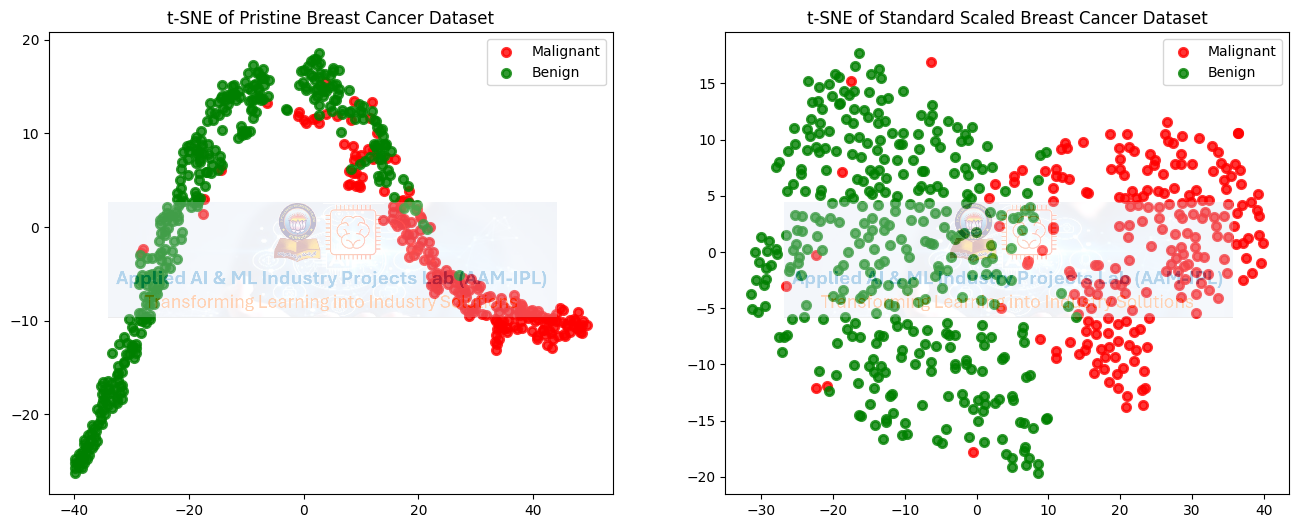

In [6]:
# Lets plot t-SNE - t-distributed stochastic neighbor embedding plot of the breast cancer data set - visual dimensionality reduction technique
import os
logical_cores = os.cpu_count()
os.environ['LOKY_MAX_CPU_COUNT'] = str(logical_cores)

# Perform t-SNE on pristine data
tsne_pristine = TSNE(n_components=2, random_state=42)
X_tsne_pristine = tsne_pristine.fit_transform(X)

# Perform t-SNE on standard scaled data
tsne_scaled = TSNE(n_components=2, random_state=42)
X_tsne_scaled = tsne_scaled.fit_transform(standard_scaled_X)

# Print the derived X and Y values
print("t-SNE on Pristine Data (first 5 points):")
print(X_tsne_pristine[:5])
print("\nt-SNE on Standard Scaled Data (first 5 points):")
print(X_tsne_scaled[:5])

# Define colors and line width for the plot
colors = ['red', 'green']
lw = 2

# Plot t-SNE results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# t-SNE on pristine data
axes[0].set_title('t-SNE of Pristine Breast Cancer Dataset')
for color, i, target_name in zip(colors, [0, 1], bcancer.target_names):
    axes[0].scatter(X_tsne_pristine[Y == i, 0], X_tsne_pristine[Y == i, 1], color=color, alpha=.8, lw=lw, label=target_name.capitalize())
axes[0].legend(loc='best', shadow=False, scatterpoints=1)

# t-SNE on standard scaled data
axes[1].set_title('t-SNE of Standard Scaled Breast Cancer Dataset')
for color, i, target_name in zip(colors, [0, 1], bcancer.target_names):
    axes[1].scatter(X_tsne_scaled[Y == i, 0], X_tsne_scaled[Y == i, 1], color=color, alpha=.8, lw=lw, label=target_name.capitalize())
axes[1].legend(loc='best', shadow=False, scatterpoints=1)

# Add watermark with the loaded image
add_aam_ipl_wama_revised(axes[0], aam_ipl_wama_image, 0.3)
add_aam_ipl_wama_revised(axes[1], aam_ipl_wama_image, 0.3)

plt.show()

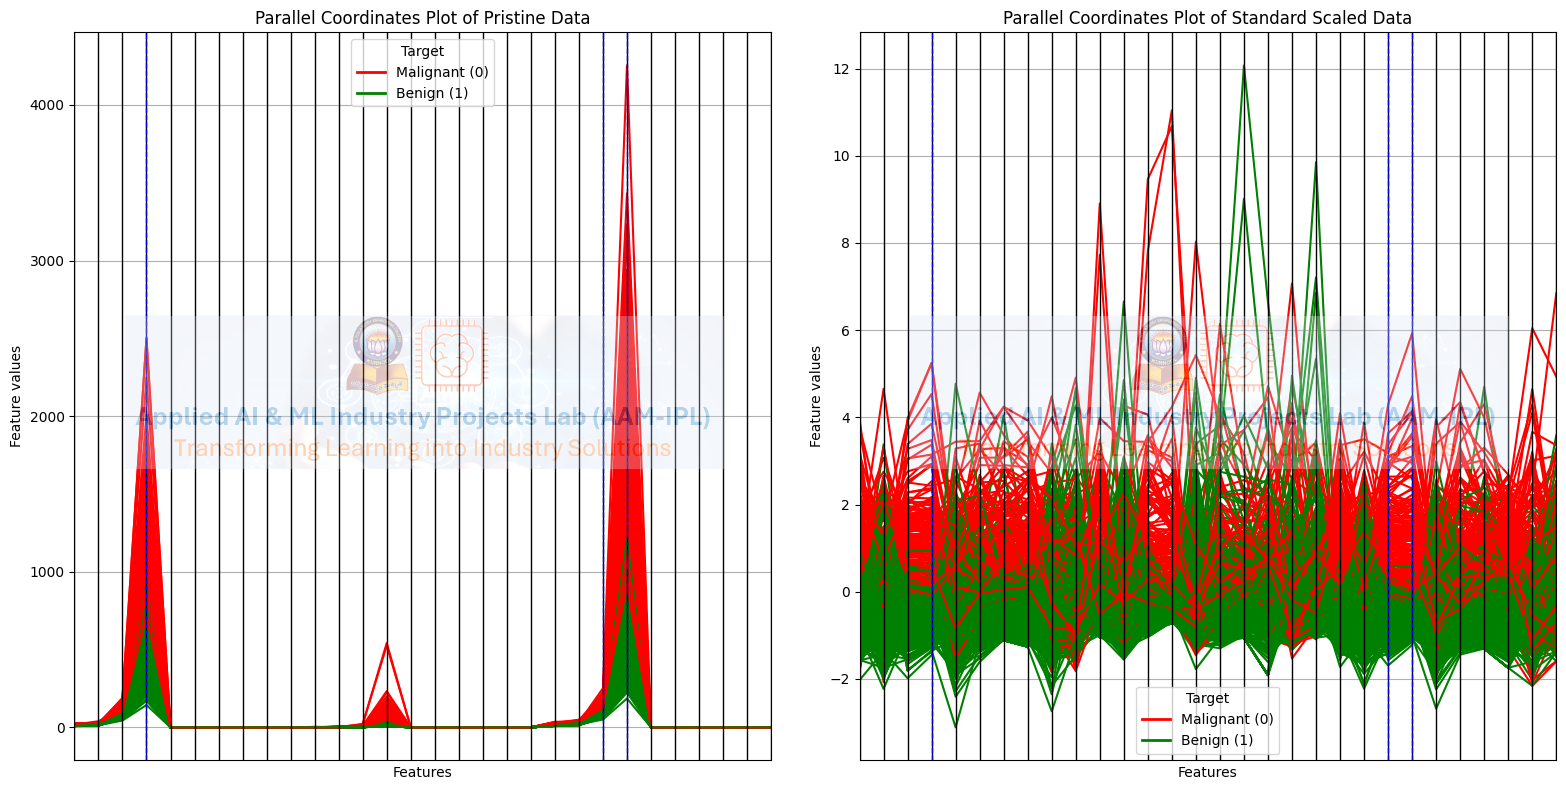

In [7]:
# Parallel coordinates plot of the breast cancer data set for pristine and standard scaled data

# Create DataFrames from the data
df_pristine = pd.DataFrame(data=X, columns=bcancer.feature_names)
df_pristine['target'] = Y

df_scaled = pd.DataFrame(data=standard_scaled_X, columns=bcancer.feature_names)
df_scaled['target'] = Y

# Convert target to string for color coding
df_pristine['target'] = df_pristine['target'].astype(str)
df_scaled['target'] = df_scaled['target'].astype(str)

# Define colors for each class explicitly
color_dict = {'0': 'red', '1': 'green'}
# Create a colormap from the color dictionary
cmap = plt.cm.colors.ListedColormap([color_dict['0'], color_dict['1']])

# Identify features with mean value above 100 - Exclude the 'target' column
mean_values = df_pristine.drop('target', axis=1).mean()
features_above_100 = mean_values[mean_values > 100].index

# Create subplots for parallel coordinates
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Parallel coordinates plot for pristine data
parallel_coordinates(df_pristine, 'target', colormap=cmap, ax=axes[0])
axes[0].set_title('Parallel Coordinates Plot of Pristine Data')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Feature values')

# Highlight the dominant features
for feature in features_above_100:
    axes[0].axvline(df_pristine.columns.get_loc(feature), color='blue', linestyle='--', linewidth=1)

# Parallel coordinates plot for standard scaled data
parallel_coordinates(df_scaled, 'target', colormap=cmap, ax=axes[1])
axes[1].set_title('Parallel Coordinates Plot of Standard Scaled Data')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Feature values')

# Highlight the dominant features
for feature in features_above_100:
    axes[1].axvline(df_scaled.columns.get_loc(feature), color='blue', linestyle='--', linewidth=1)

# Add custom legend
handles = [plt.Line2D([0], [0], color=color_dict['0'], lw=2), plt.Line2D([0], [0], color=color_dict['1'], lw=2)]
axes[0].legend(handles, ['Malignant (0)', 'Benign (1)'], title='Target')
axes[1].legend(handles, ['Malignant (0)', 'Benign (1)'], title='Target')

# Remove x-axis labels
axes[0].set_xticks([])
axes[1].set_xticks([])

# Add watermark to both plots
add_aam_ipl_wama_revised(axes[0], aam_ipl_wama_image, 0.4)
add_aam_ipl_wama_revised(axes[1], aam_ipl_wama_image, 0.4)

plt.tight_layout()
plt.show()

Precision = True Positives / (True Positives + False Positives)
Recall = True Positives / (True Positives + False Negatives)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall) 

Linear SVM Accuracy Score: 97.37%
RBF Kernel SVM Accuracy Score: 97.37%
Poly Kernel SVM Accuracy Score: 90.35%
Sigmoid Kernel SVM Accuracy Score: 95.61%
Logistic Regression Accuracy Score: 96.49%
Decision Tree Accuracy Score: 92.98%
K-Nearest Neighbors Accuracy Score: 95.61%
Naive Bayes Accuracy Score: 90.35%
Random Forest Accuracy Score: 94.74%


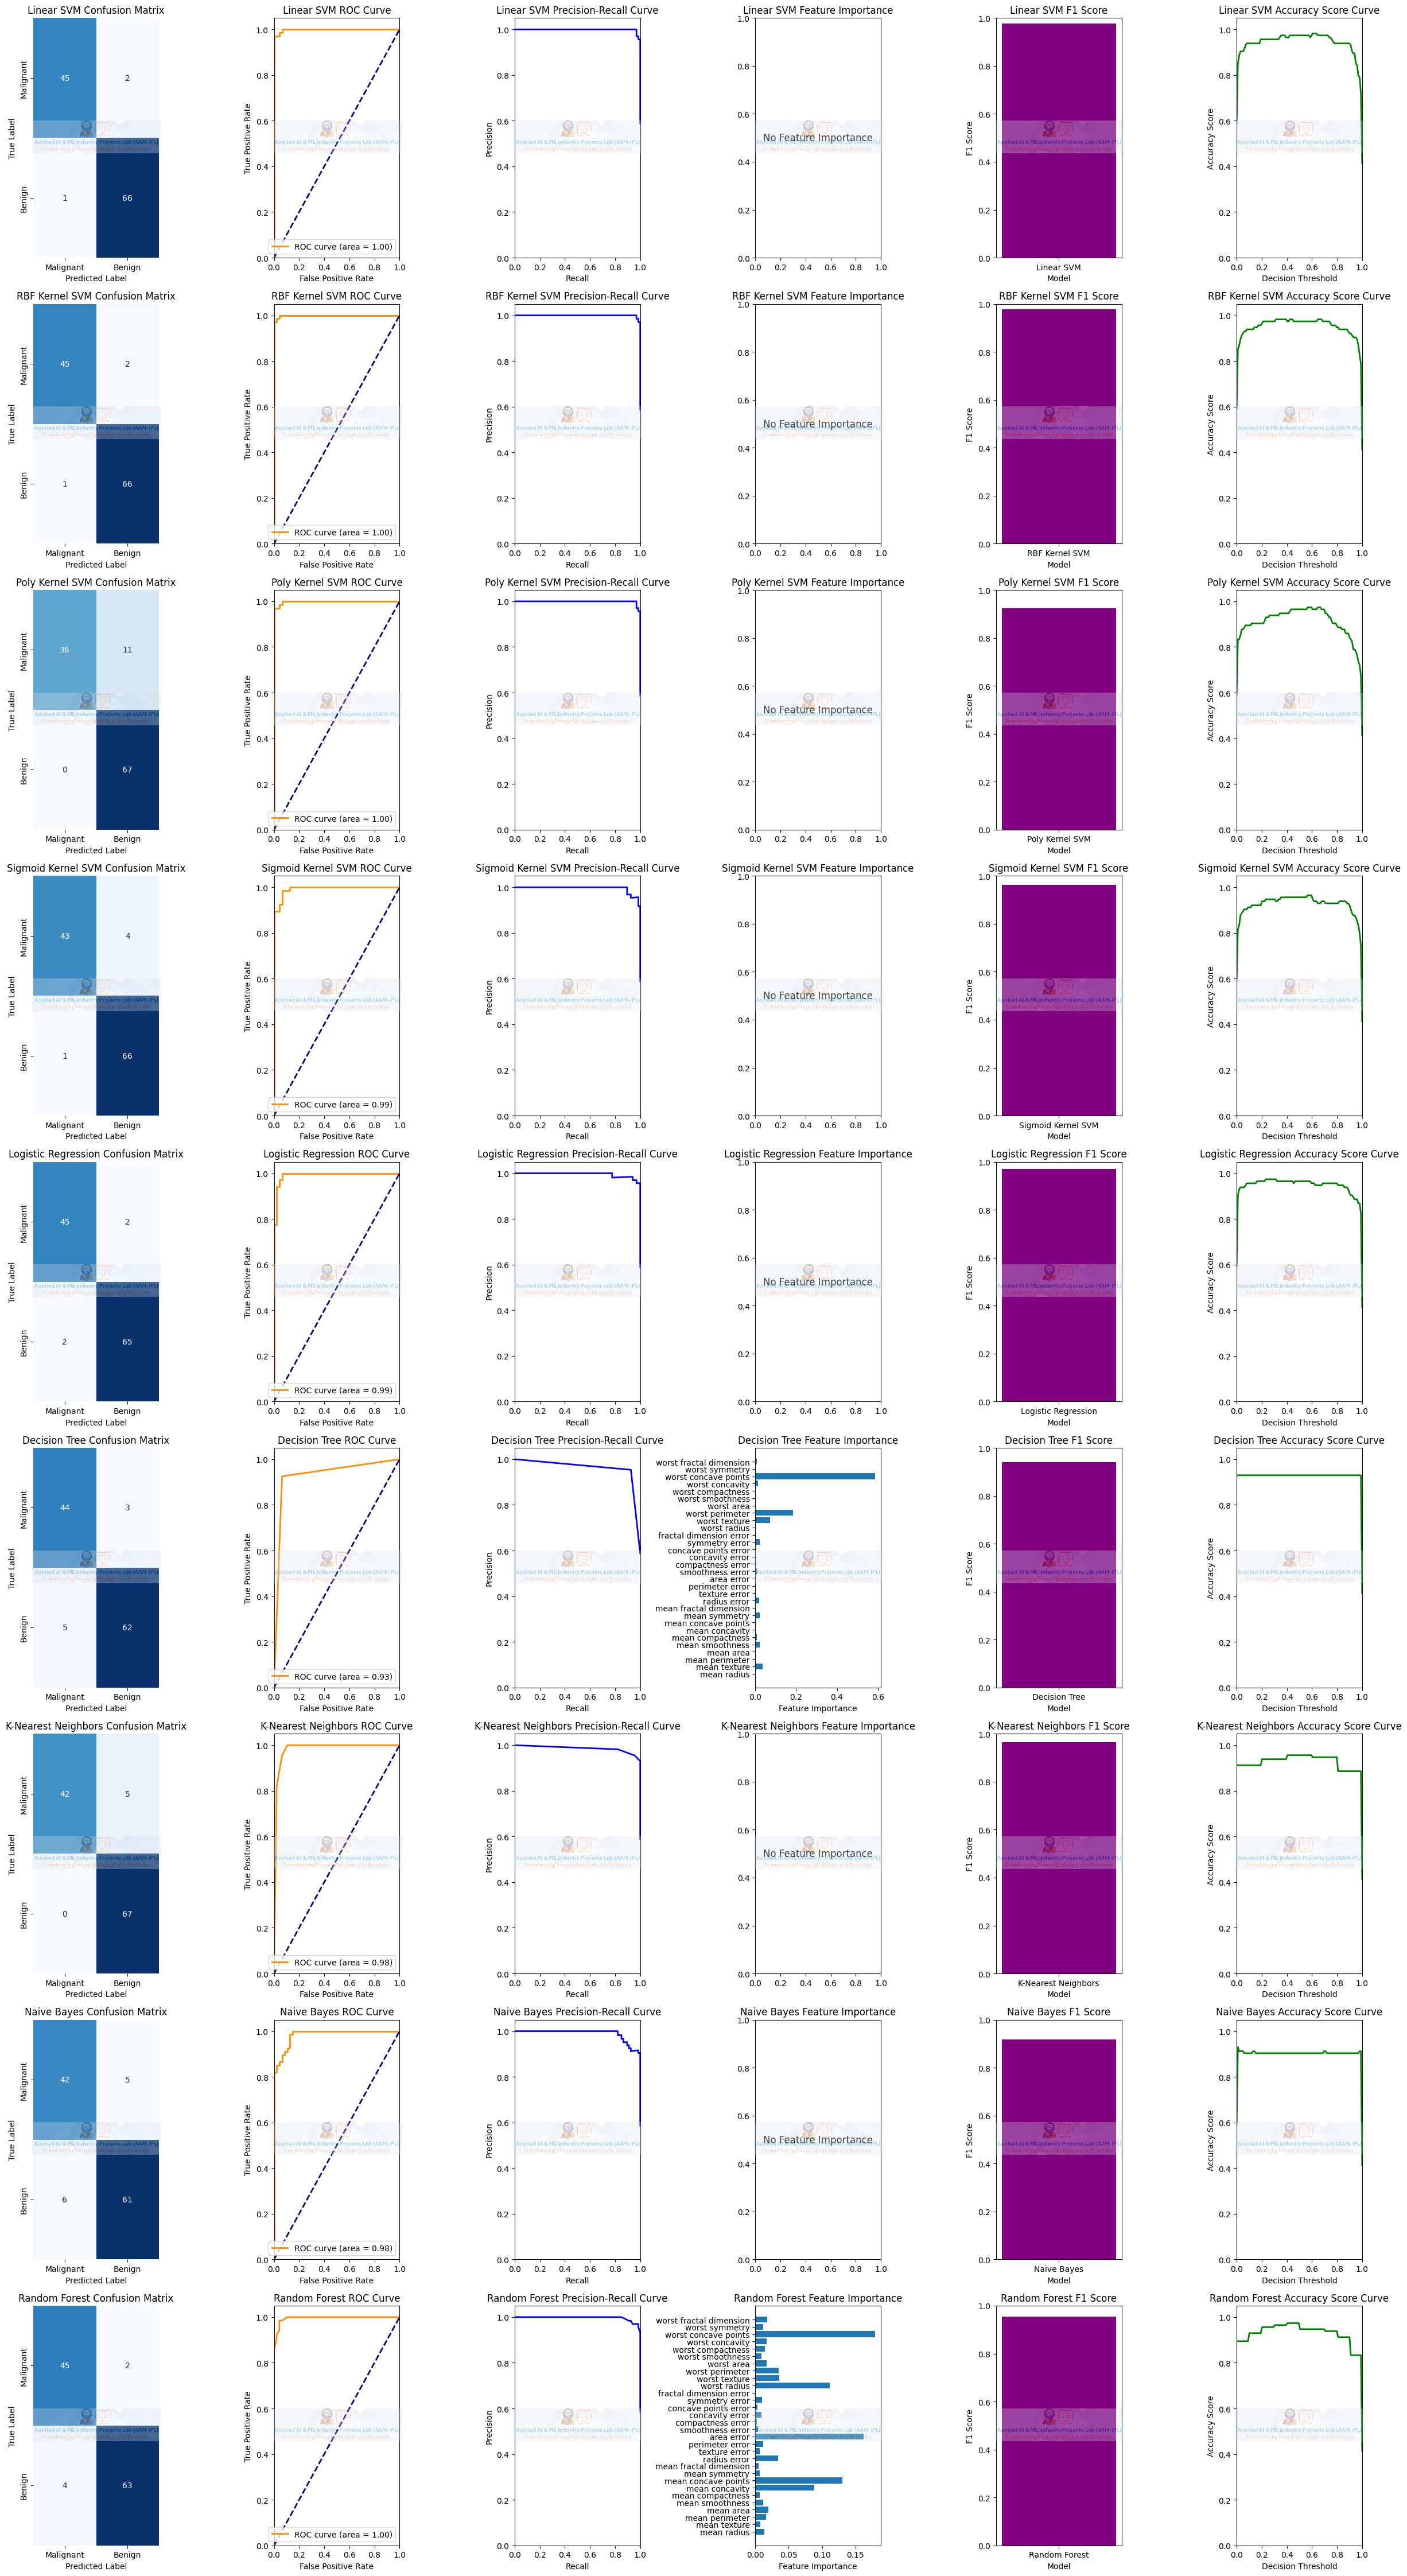

In [8]:
# Plot curves for all classifiers - accuracy, confusion matrix, ROC curve, PR curve, feature importance, F1 score
    
# Define the formulae as strings
precision_formula = "Precision = True Positives / (True Positives + False Positives)"
recall_formula = "Recall = True Positives / (True Positives + False Negatives)"
f1_score_formula = "F1 Score = 2 * (Precision * Recall) / (Precision + Recall)"

# Print the formulae
print(precision_formula)
print(recall_formula)
print(f1_score_formula, '\n')

# Define a dictionary of models
models = {
    'Linear SVM': SVC(kernel='linear', random_state=0, probability=True),
    'RBF Kernel SVM': SVC(kernel='rbf', random_state=0, probability=True),
    'Poly Kernel SVM': SVC(kernel='poly', degree=3, random_state=0, probability=True),
    'Sigmoid Kernel SVM': SVC(kernel='sigmoid', random_state=0, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
}

# Initialize plot
fig, axs = plt.subplots(len(models), 6, figsize=(24, len(models) * 5))
fig.subplots_adjust(hspace=0.5)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(standard_scaled_X, Y, test_size=0.2, random_state=0)

# Loop through models
for idx, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train, Y_train)
    
    # Predict results
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} Accuracy Score: {100 * accuracy:.2f}%")
    
    # Compute metrics
    cm = confusion_matrix(Y_test, Y_pred)
    fpr, tpr, _ = roc_curve(Y_test, Y_proba) if Y_proba is not None else ([], [], [])
    roc_auc = auc(fpr, tpr) if Y_proba is not None else None
    precision, recall, _ = precision_recall_curve(Y_test, Y_proba) if Y_proba is not None else ([], [], [])
    f1 = f1_score(Y_test, Y_pred)

    # Plot Accuracy Score curve
    if Y_proba is not None:
        thresholds = np.linspace(0, 1, 100)
        accuracy_scores = [accuracy_score(Y_test, (Y_proba > threshold).astype(int)) for threshold in thresholds]
        axs[idx, 5].plot(thresholds, accuracy_scores, color='green', lw=2)
        axs[idx, 5].set_xlim([0.0, 1.0])
        axs[idx, 5].set_ylim([0.0, 1.05])
        axs[idx, 5].set_xlabel('Decision Threshold')
        axs[idx, 5].set_ylabel('Accuracy Score')
        axs[idx, 5].set_title(f'{name} Accuracy Score Curve')
    else:
        axs[idx, 5].text(0.5, 0.5, 'No Accuracy Curve', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx, 5].set_title(f'{name} Accuracy Score Curve')
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[idx, 0], cbar=False, xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    axs[idx, 0].set_xlabel('Predicted Label')
    axs[idx, 0].set_ylabel('True Label')
    axs[idx, 0].set_title(f'{name} Confusion Matrix')

    # Plot ROC curve
    if Y_proba is not None:
        axs[idx, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        axs[idx, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axs[idx, 1].set_xlim([0.0, 1.0])
        axs[idx, 1].set_ylim([0.0, 1.05])
        axs[idx, 1].set_xlabel('False Positive Rate')
        axs[idx, 1].set_ylabel('True Positive Rate')
        axs[idx, 1].set_title(f'{name} ROC Curve')
        axs[idx, 1].legend(loc='lower right')
    else:
        axs[idx, 1].text(0.5, 0.5, 'No ROC Curve', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx, 1].set_title(f'{name} ROC Curve')

    # Plot Precision-Recall curve
    if Y_proba is not None:
        axs[idx, 2].plot(recall, precision, color='blue', lw=2)
        axs[idx, 2].set_xlim([0.0, 1.0])
        axs[idx, 2].set_ylim([0.0, 1.05])
        axs[idx, 2].set_xlabel('Recall')
        axs[idx, 2].set_ylabel('Precision')
        axs[idx, 2].set_title(f'{name} Precision-Recall Curve')
    else:
        axs[idx, 2].text(0.5, 0.5, 'No PR Curve', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx, 2].set_title(f'{name} Precision-Recall Curve')

    # Plot feature importance for models that have it
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        axs[idx, 3].barh(range(len(importances)), importances, align='center')
        axs[idx, 3].set_yticks(range(len(importances)))
        axs[idx, 3].set_yticklabels(bcancer.feature_names)
        axs[idx, 3].set_xlabel('Feature Importance')
        axs[idx, 3].set_title(f'{name} Feature Importance')
    else:
        axs[idx, 3].text(0.5, 0.5, 'No Feature Importance', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx, 3].set_title(f'{name} Feature Importance')

    # Plot F1 Score
    axs[idx, 4].bar(name, f1, color='purple')
    axs[idx, 4].set_ylim([0, 1])
    axs[idx, 4].set_xlabel('Model')
    axs[idx, 4].set_ylabel('F1 Score')
    axs[idx, 4].set_title(f'{name} F1 Score')
      
   # Add watermark to all subplots
    for ax in axs[idx, :]:        
        add_aam_ipl_wama_revised(ax, aam_ipl_wama_image, 0.15)

plt.tight_layout()
plt.show()


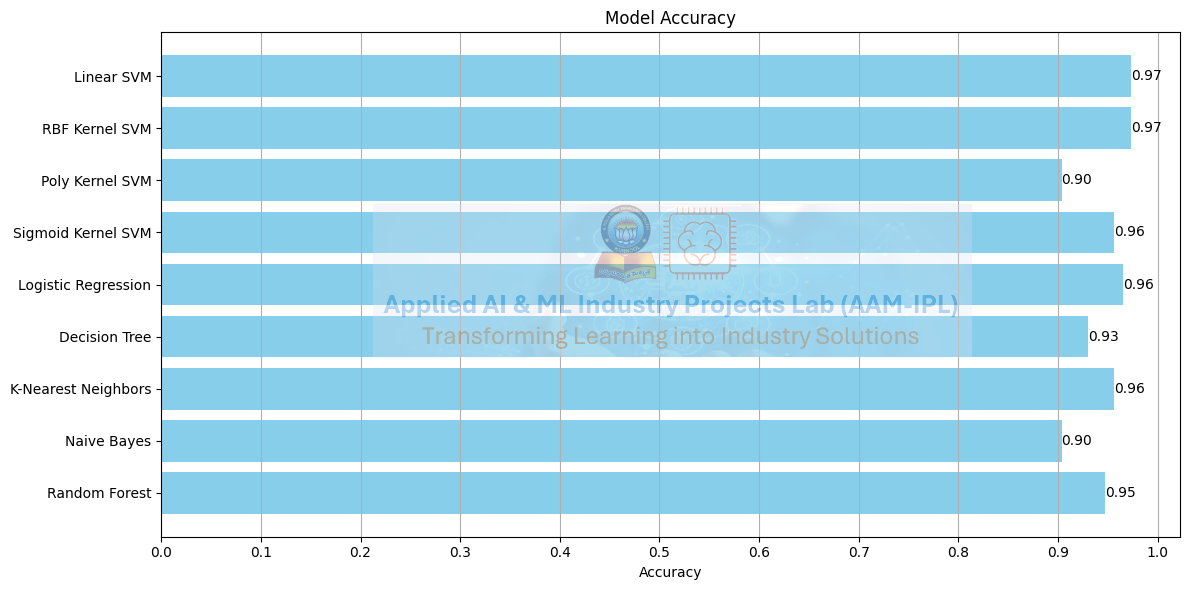

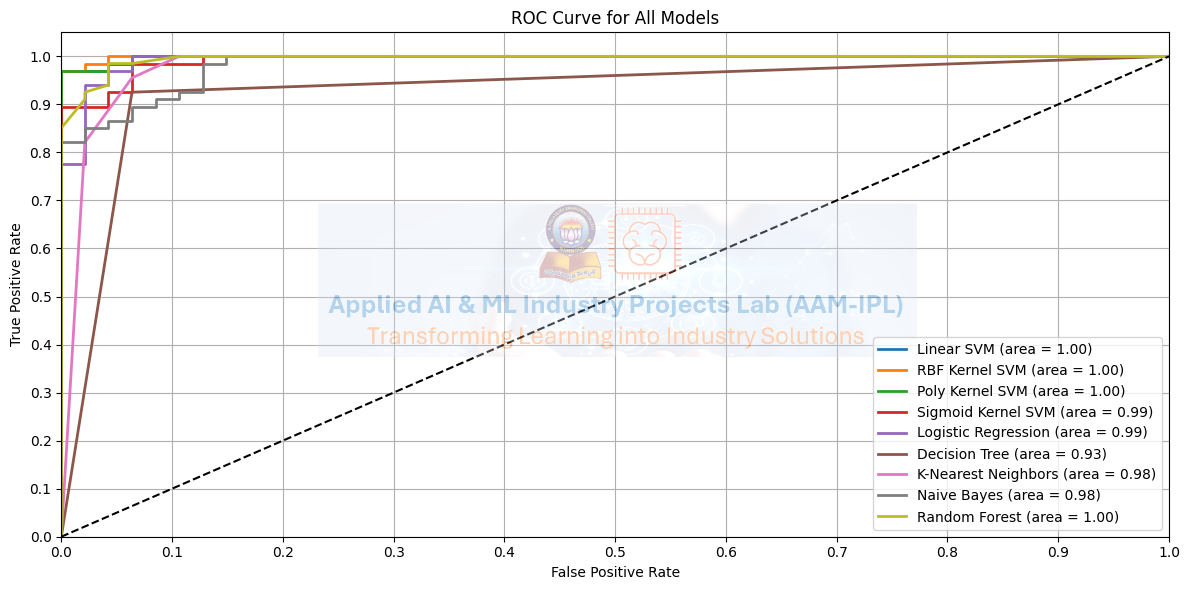

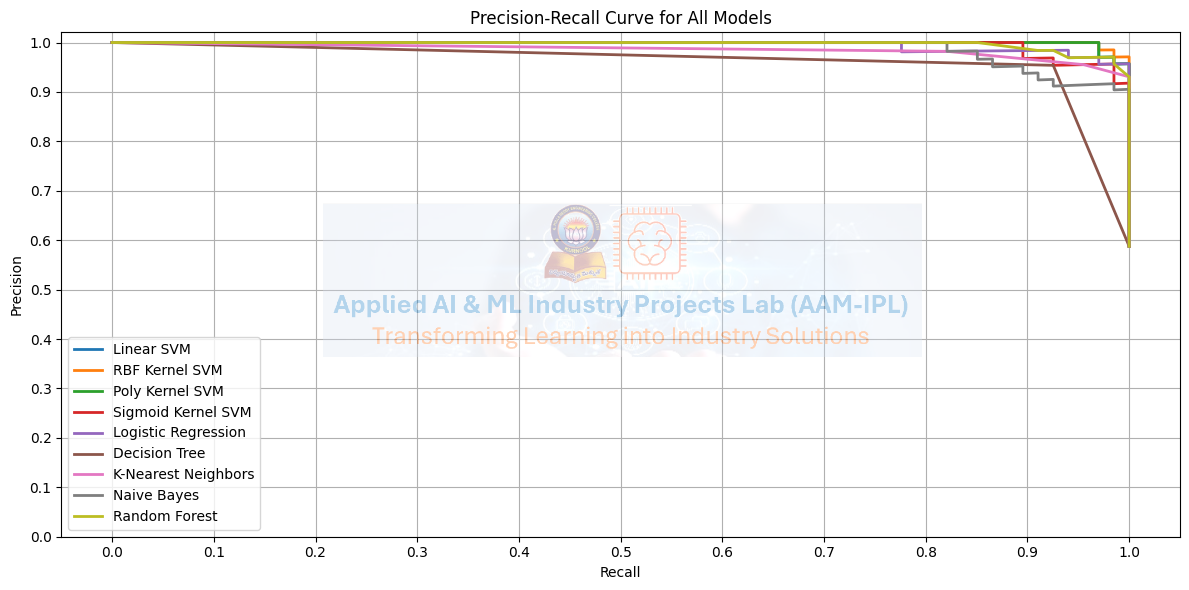

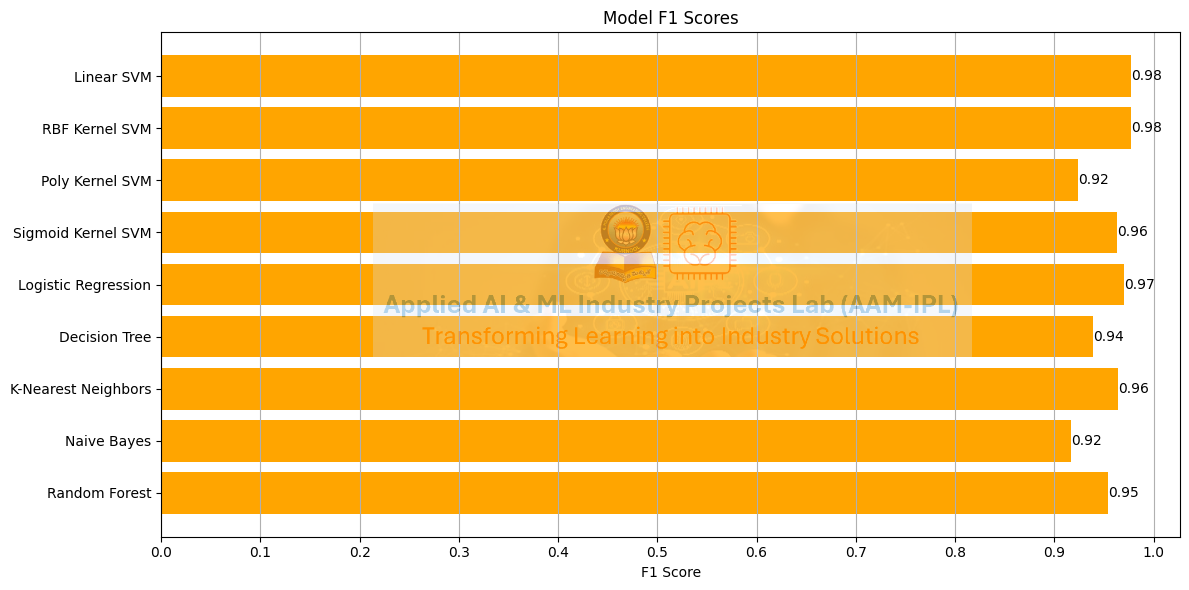

In [9]:
# Plot relative performance plots of all models - accuracy, ROC curve, PR curve, F1 score

# Define a dictionary of models
models = {
    'Linear SVM': SVC(kernel='linear', random_state=0, probability=True),
    'RBF Kernel SVM': SVC(kernel='rbf', random_state=0, probability=True),
    'Poly Kernel SVM': SVC(kernel='poly', degree=3, random_state=0, probability=True),
    'Sigmoid Kernel SVM': SVC(kernel='sigmoid', random_state=0, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
}

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(standard_scaled_X, Y, test_size=0.2, random_state=0)

# Initialize dictionaries to store metrics
accuracy_scores = {}
f1_scores = {}
roc_data = {}
prc_data = {}

# Calculate metrics
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores[name] = accuracy
    
    # F1 Score
    f1 = f1_score(Y_test, Y_pred)
    f1_scores[name] = f1
    
    # ROC Curve
    if Y_proba is not None:
        fpr, tpr, _ = roc_curve(Y_test, Y_proba)
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)
        
        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(Y_test, Y_proba)
        prc_data[name] = (precision, recall)

# Plot Accuracy Scores
plt.figure(figsize=(12, 6))
bars = plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.gca().invert_yaxis()
plt.grid(axis='x')
# Set x-axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
add_aam_ipl_wama_revised(plt.gca(), aam_ipl_wama_image, 0.4)

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')
plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(12, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()
# Set x-axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
# Set y-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))
add_aam_ipl_wama_revised(plt.gca(), aam_ipl_wama_image, 0.4)
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(12, 6))
for name, (precision, recall) in prc_data.items():
    plt.plot(recall, precision, lw=2, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for All Models')
plt.legend(loc='best')
plt.grid()
# Set x-axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
# Set y-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))
add_aam_ipl_wama_revised(plt.gca(), aam_ipl_wama_image, 0.4)
plt.tight_layout()
plt.show()

# Plot F1 Scores
plt.figure(figsize=(12, 6))
bars = plt.barh(list(f1_scores.keys()), list(f1_scores.values()), color='orange')
plt.xlabel('F1 Score')
plt.title('Model F1 Scores')
plt.gca().invert_yaxis()
plt.grid(axis='x')
# Set x-axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
add_aam_ipl_wama_revised(plt.gca(), aam_ipl_wama_image, 0.4)
# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')
plt.tight_layout()
plt.show()

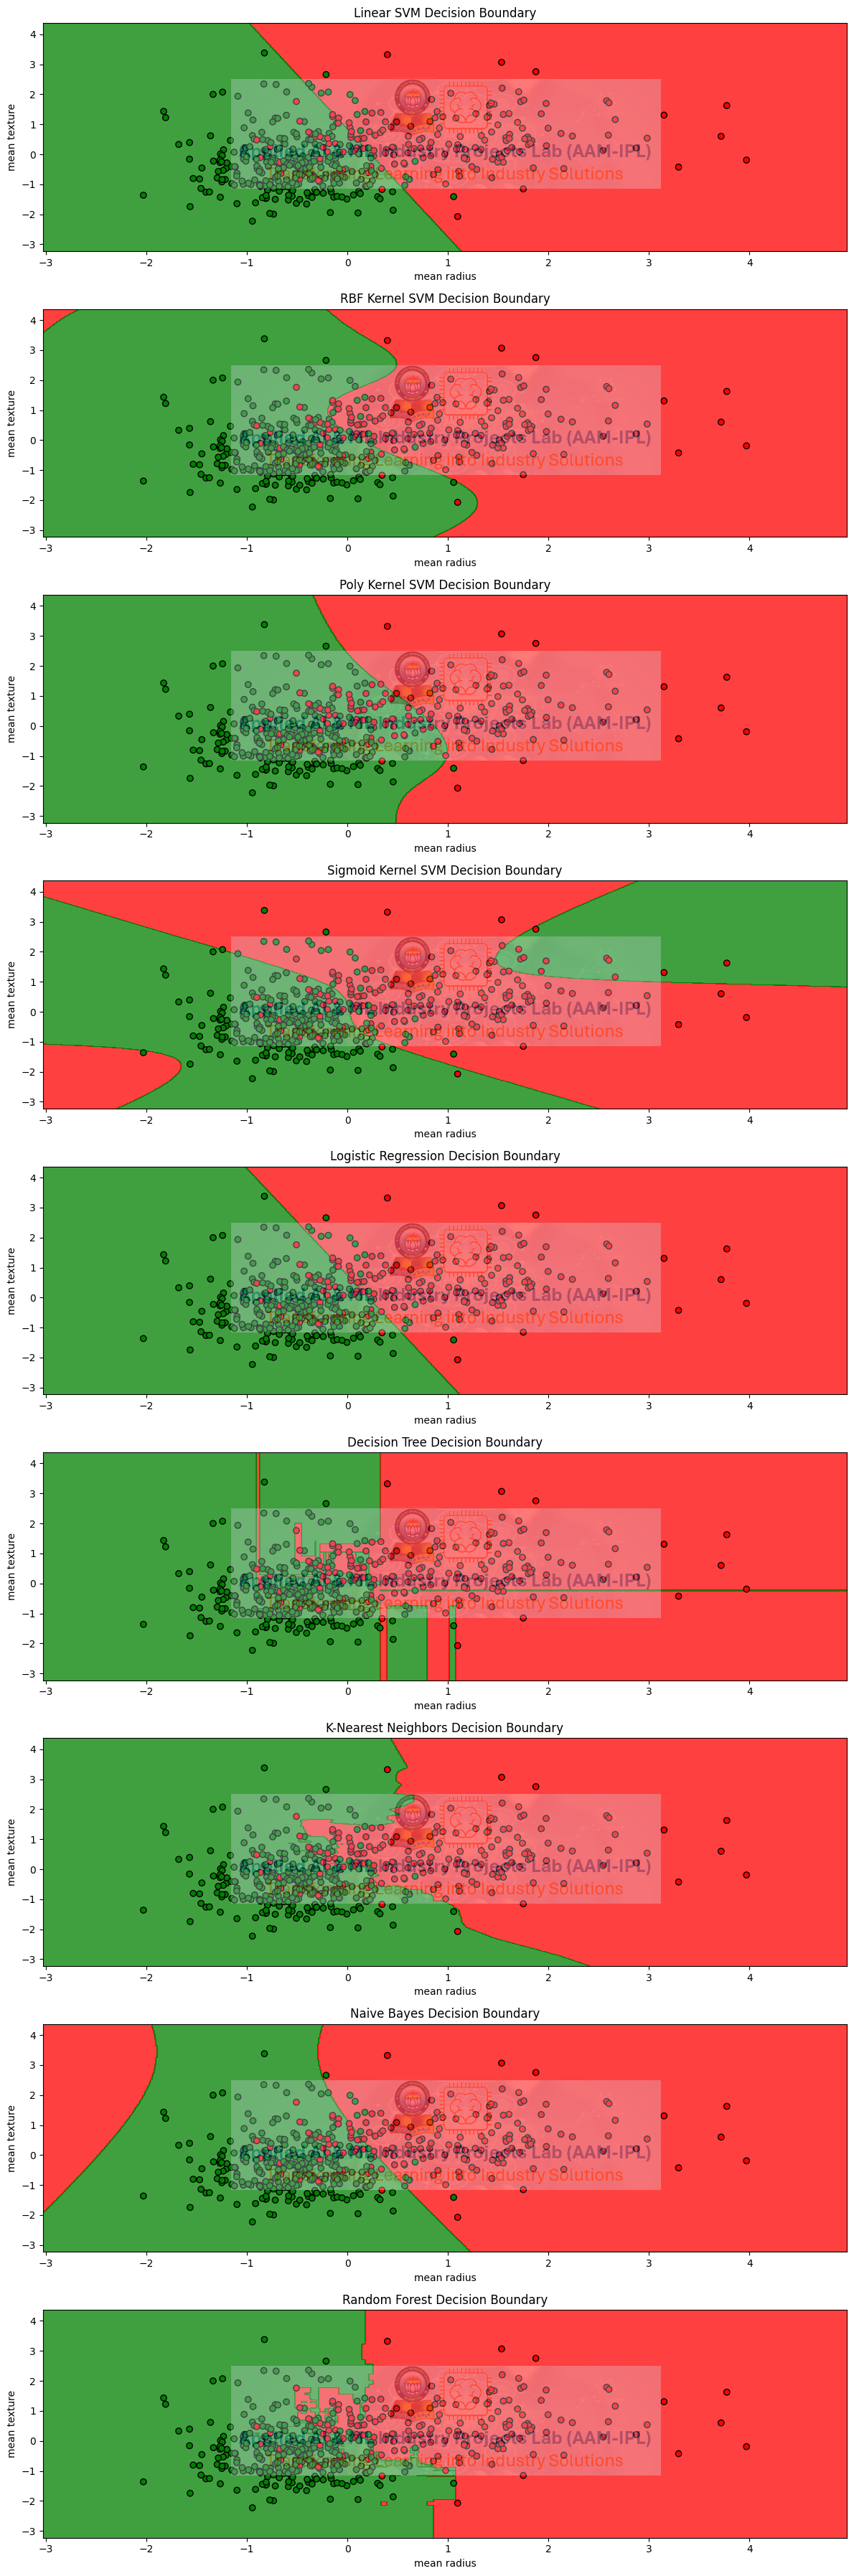

In [10]:
# Plot decision boundaries
# Define a dictionary of models
models = {
    'Linear SVM': SVC(kernel='linear', random_state=0),
    'RBF Kernel SVM': SVC(kernel='rbf', random_state=0),
    'Poly Kernel SVM': SVC(kernel='poly', degree=3, random_state=0),
    'Sigmoid Kernel SVM': SVC(kernel='sigmoid', random_state=0),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
}

# Initialize plot
fig, axs = plt.subplots(len(models), 1, figsize=(12, len(models) * 4))
fig.subplots_adjust(hspace=0.5)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(standard_scaled_X, Y, test_size=0.2, random_state=0)

# Select two features for decision boundary plot
feature1, feature2 = 0, 1  # example feature indices, change as needed

# Loop through models
for idx, (name, model) in enumerate(models.items()):
    # Train and plot decision boundary on two features
    X_train_2d = X_train[:, [feature1, feature2]]
    X_test_2d = X_test[:, [feature1, feature2]]
    model_2d = model.__class__(**model.get_params())  # Create a new instance with the same parameters
    model_2d.fit(X_train_2d, Y_train)

    X_set, y_set = X_train_2d, Y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    Z = model_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    # Plot the decision boundary
    axs[idx].contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    axs[idx].scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')
    axs[idx].set_xlim(X1.min(), X1.max())
    axs[idx].set_ylim(X2.min(), X2.max())
    axs[idx].set_xlabel(bcancer.feature_names[feature1])
    axs[idx].set_ylabel(bcancer.feature_names[feature2])
    axs[idx].set_title(f'{name} Decision Boundary')

    # Add watermark to the current subplot
    add_aam_ipl_wama_revised(axs[idx], aam_ipl_wama_image, 0.4)

plt.tight_layout()
plt.show()


In [11]:
!jupyter nbconvert --to pdf AAM-IPL-Wk-5-SVM-ProjectName-Full-Code-V4.ipynb

C:\Program Files\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook AAM-IPL-Wk-5-SVM-ProjectName-Full-Code-V4.ipynb to pdf
[NbConvertApp] Support files will be in AAM-IPL-Wk-5-SVM-ProjectName-Full-Code-V4_files\
[NbConvertApp] Making directory .\AAM-IPL-Wk-5-SVM-ProjectName-Full-Code-V4_files
[NbConvertApp] Writing 105429 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citatio